# Introduction
For this final project on Supervised Machine Learning, we will be analyzing the personal bank loans and determining what features are associated with people earning a personal bank loan. We will be using the Adaboost algorithm on selected features to identify the best hyperparameters to use and see how accurate our model predicts on test data. We will compare the model performance of Adaboost with other machine learning models as well.

The data we'll be using is the Bank_Personal_Loan_Modelling dataset that's publicly available on kaggle.com <br>
URL: https://www.kaggle.com/datasets/zohrehtofighizavareh/bank-personal-loan)

This dataset contains the information of more than 5000 customers, based on the points that each customer has earned, a loan is offered to them. The features are:

__Age:__ Customer's age in completed years <br>
__Experience:__ Years of professional experience <br>
__Income:__ Annual income of the customer <br>
__Zip code:__ home address Zip code <br>
__Family:__ Family size of customer <br>
__CCAvg:__ Spending on credit cards per month <br>
__Education:__ Education level (Undergraduate=1, Graduate= 2, Advanced=3) <br>
__Mortgage:__ Value of house mortgage if any <br>
__Personalloan:__ Did this customer accept the personal loan offered in the last campaign? <br>
__Securityaccount:__ Does the customer have a securities account with this bank? <br>
__Cd_account:__ Does the customer have a certificate of deposit (CD) account with this bank? <br>
__Online:__ Does the customer use internet banking facilities? <br>
__Creditcard:__ Does the customer use a credit card issued by Universal Bank? <br>

# Project Overview
1. Load data, Exploratory Data Analysis (EDA), and cleaning
2. Prepare dataset for model training 
3. Train the model using Adaboost and determine best hyperparameters 
4. Prediction results and compare to other models
5. Discussion/Conclusion

## 1. Load data, Exploratory Data Analysis (EDA), and cleaning

In [1]:
##Load packages

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import math
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
##from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df= pd.read_csv('Bank_Personal_Loan_Modelling.csv', sep= ',')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
## Let's shape the data shape
df.shape

##our data has 5000 rows and 14 features. Looks good so far to use for our Adaboost model

(5000, 14)

In [4]:
## Check for Null values
print(df.isnull().sum())

## Check infomation of the data types
print(df.dtypes)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


[[<AxesSubplot:title={'center':'ID'}>
  <AxesSubplot:title={'center':'Age'}>
  <AxesSubplot:title={'center':'Experience'}>
  <AxesSubplot:title={'center':'Income'}>]
 [<AxesSubplot:title={'center':'ZIP Code'}>
  <AxesSubplot:title={'center':'Family'}>
  <AxesSubplot:title={'center':'CCAvg'}>
  <AxesSubplot:title={'center':'Education'}>]
 [<AxesSubplot:title={'center':'Mortgage'}>
  <AxesSubplot:title={'center':'Personal Loan'}>
  <AxesSubplot:title={'center':'Securities Account'}>
  <AxesSubplot:title={'center':'CD Account'}>]
 [<AxesSubplot:title={'center':'Online'}>
  <AxesSubplot:title={'center':'CreditCard'}> <AxesSubplot:>
  <AxesSubplot:>]]


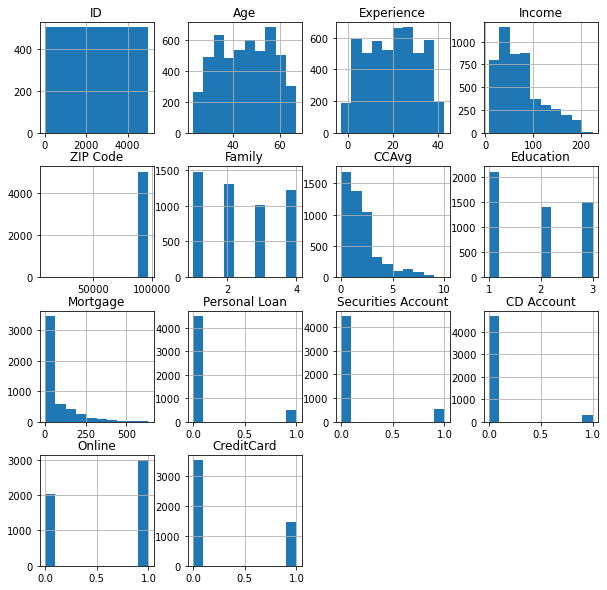

In [5]:
##Plot and visulaize histogram of each column in the dataframe

dfhistall= df.hist(bins=10, figsize= (10,10))
print(dfhistall)

In [6]:
## For this dataset, it would not make since to have negative values in any columns 
## (besides the label values  for Adaboost classfier using -1 and 1)
## For example, there can not be negative age, experience, income or family  
## For this reason we'll check for any number in any columns that are below 0 and remove those rows

## Now lets check the number of unique values for each column
for c in list(df.columns):
    print("Num of unique values for", c,"=", df[c].nunique(), "& presence of neg =", (df[c]<0).any())

Num of unique values for ID = 5000 & presence of neg = False
Num of unique values for Age = 45 & presence of neg = False
Num of unique values for Experience = 47 & presence of neg = True
Num of unique values for Income = 162 & presence of neg = False
Num of unique values for ZIP Code = 467 & presence of neg = False
Num of unique values for Family = 4 & presence of neg = False
Num of unique values for CCAvg = 108 & presence of neg = False
Num of unique values for Education = 3 & presence of neg = False
Num of unique values for Mortgage = 347 & presence of neg = False
Num of unique values for Personal Loan = 2 & presence of neg = False
Num of unique values for Securities Account = 2 & presence of neg = False
Num of unique values for CD Account = 2 & presence of neg = False
Num of unique values for Online = 2 & presence of neg = False
Num of unique values for CreditCard = 2 & presence of neg = False


In [7]:
## Clean data
## Drop rows with any negative number

df2= df.drop(df[ df['Experience'] <0].index)
print("Presence of neg for Experience=", (df2['Experience']<0).any())

Presence of neg for Experience= False


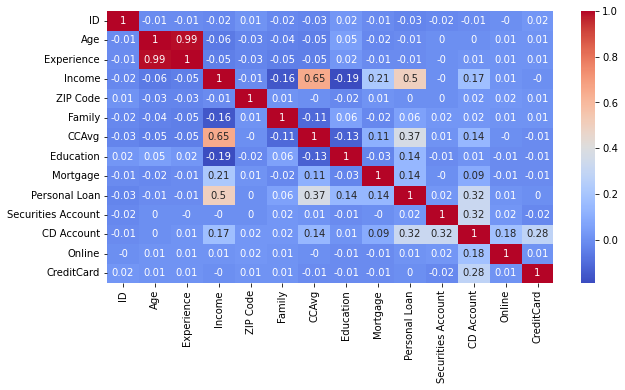

In [8]:
## Let's check the correlation of the columns
plt.rcParams["figure.figsize"]=10,5
mat= df2.corr().round(2)
sns.heatmap(mat, annot=True,
           cmap="coolwarm")
plt.show()

                 names  Personal Loan
1               Income           0.50
2                CCAvg           0.37
3           CD Account           0.32
4            Education           0.14
5             Mortgage           0.14
6               Family           0.06
7   Securities Account           0.02
8               Online           0.01
9             ZIP Code           0.00
10          CreditCard           0.00
11                 Age          -0.01
12          Experience          -0.01
13                  ID          -0.03


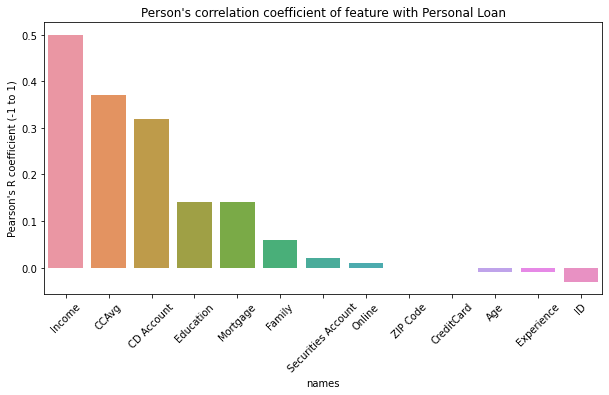

In [9]:
## Order and plot the coorelation matrix pearsons r for each feature 
## and relation with our label to predict, personal loan

newmat= mat.sort_values(['Personal Loan'], ascending= False)
perloan= newmat['Personal Loan']

##newdataframe for plotting. remove personal load in row
perloan2= perloan.rename_axis("names").reset_index()
perloan2= perloan2[perloan2['Personal Loan'] <1]
print(perloan2)

##plot
featsbar= perloan2['names'] 
loanbar= perloan2['Personal Loan']
sns.set_palette('Set2')
sns.barplot(x=featsbar, y=loanbar)
plt.xticks(rotation=45)
plt.ylabel("Pearson's R coefficient (-1 to 1)")
plt.title("Person's correlation coefficient of feature with Personal Loan")
plt.show()

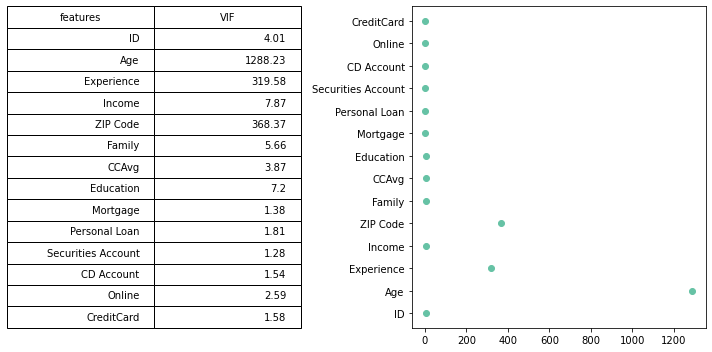

In [10]:
## We can specifically check for any multicollinearity by looking at the variance inflation factor (VIF)
## The general rule is a VIF of greater 10 indicates high change of multicollinearity between variables

##create datfrmae of VIF
vifdat= pd.DataFrame()
vifdat["features"]= df2.columns
vifdat["VIF"]= [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]
vifdat["VIF"]= vifdat["VIF"].round(decimals = 2)

plt.rcParams["figure.figsize"]=[10,5]
plt.rcParams["figure.autolayout"]=True

fig = plt.figure()
left = fig.add_subplot(121)
left.axis('off')
tab = left.table(cellText= vifdat.values, bbox= [0,0,1,1], colLabels=vifdat.columns)
right = fig.add_subplot(122)
right.scatter(x= "VIF", y="features", data=vifdat)

plt.show()

In [11]:
## We an see that age, experience and zip code have high VIF (greater than 10) 
## so we can drop them due to high multicollinearity with the other feature variables
## It also makes sense to drop ID since its an identifier with many unique values 

unnec_feats= ['ZIP Code', 'Age', 'Experience', 'ID']
df3= df2.drop(unnec_feats, axis=1)
## check data to see if features are removed correctly
df3.tail(5)

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,40,1,1.9,3,0,0,0,0,1,0
4996,15,4,0.4,1,85,0,0,0,1,0
4997,24,2,0.3,3,0,0,0,0,0,0
4998,49,3,0.5,2,0,0,0,0,1,0
4999,83,3,0.8,1,0,0,0,0,1,1


## 2. Prepare dataset for model training 

In [12]:
## Since we are going to being commparing Adaboost with other ML models like logistic regression
## and k nearest neighbors we should normalize the data using min_max scaling (0-1)
sca= preprocessing.MinMaxScaler()
names= df3.columns
trans= sca.fit_transform(df3)
scaled_df3= pd.DataFrame(trans, columns=names) 

## Check end of dataframe to see if our functions worked correctly
df3= scaled_df3
df3.tail(5)

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4943,0.148148,0.000000,0.19,1.0,0.000000,0.0,0.0,0.0,1.0,0.0
4944,0.032407,1.000000,0.04,0.0,0.133858,0.0,0.0,0.0,1.0,0.0
4945,0.074074,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
4946,0.189815,0.666667,0.05,0.5,0.000000,0.0,0.0,0.0,1.0,0.0
4947,0.347222,0.666667,0.08,0.0,0.000000,0.0,0.0,0.0,1.0,1.0


In [13]:
## Now we'll create X and y from the processed dataframe
dfproc= df3
X=dfproc.loc[:, dfproc.columns !='Personal Loan']
y=dfproc.loc[:, dfproc.columns =='Personal Loan']

X_train, X_test, y_train, y_test= train_test_split(X,y,
                                  random_state=1234,
                                  test_size=0.25,
                                  shuffle=True)

## Check to see if dimensions for train and test are correct (75% and 25%)
print("Train X rows:",X_train.shape[0], 
      "| Test X rows:", X_test.shape[0], 
      "| Train y rows:", y_train.shape[0], 
      "| Test y rows:", y_test.shape[0])

Train X rows: 3711 | Test X rows: 1237 | Train y rows: 3711 | Test y rows: 1237


## 3. Train the model using Adaboost and determine best hyperparameters  

In [14]:
## Quick view of X and y train data
## They need to be in the correct shapes (2d and 1d array) for modeling)
xtrain= np.array(X_train)
ytrain= y_train.values.flatten()
xtest= np.array(X_test)
ytest= y_test.values.flatten()

print(xtrain)
print(ytrain)

[[0.61574074 0.33333333 0.49       ... 0.         0.         1.        ]
 [0.02777778 1.         0.04       ... 0.         1.         0.        ]
 [0.34722222 0.         0.28       ... 0.         0.         0.        ]
 ...
 [0.7962963  0.         0.17       ... 0.         1.         1.        ]
 [0.66666667 0.66666667 0.33       ... 0.         1.         0.        ]
 [0.25462963 0.         0.16       ... 0.         1.         1.        ]]
[1. 0. 0. ... 0. 1. 0.]


[Text(279.0, 203.85000000000002, 'Income <= 0.456\ngini = 0.176\nsamples = 100.0%\nvalue = [0.902, 0.098]\nclass = y[0]'),
 Text(139.5, 67.94999999999999, 'gini = 0.028\nsamples = 77.4%\nvalue = [0.986, 0.014]\nclass = y[0]'),
 Text(418.5, 67.94999999999999, 'gini = 0.473\nsamples = 22.6%\nvalue = [0.615, 0.385]\nclass = y[0]')]

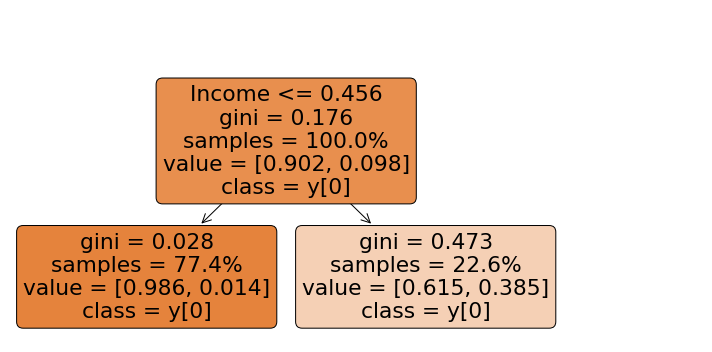

In [15]:
## before we go into the next step of grid searching using the adaboost model, lets visualize a decision tree.
## The decision tree at depth one will be used as out wek base classifier to grow our stumps in adaboost 

treeclf= tree.DecisionTreeClassifier(max_depth=1, random_state=1234)
treeclf= treeclf.fit(xtrain, ytrain)
tree.plot_tree(treeclf, proportion=True, 
               class_names=True, 
               rounded= True, 
               feature_names= X_train.columns,
               filled= True)

In [16]:
## Define our model for Checking multiple hyperparameters to using GridSearchCV to idenfity best parameters
adamodel= AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=1, random_state= 1234),  
                             random_state= 1234)

## Define decitionaries of parameters to use in the grid search
params= {'n_estimators': list(range(25,200+25,25)),
        'learning_rate': list(np.arange(0.100, 1+0.100, 0.100))}

## Grid search fit
grid= GridSearchCV(cv=3, 
                   estimator= adamodel,
                   param_grid= params)
#ada_grid= grid.fit(xtrain, ytrain)
##ada_grid
grid.fit(xtrain, ytrain)


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                random_state=1234),
                                          random_state=1234),
             param_grid={'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6, 0.7000000000000001, 0.8,
                                           0.9, 1.0],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

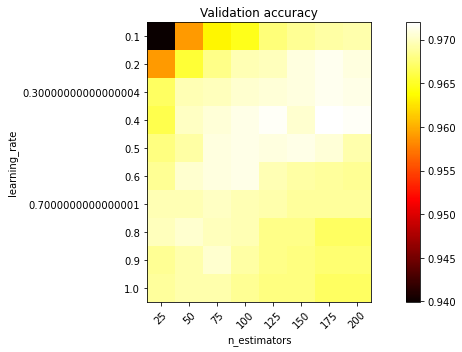

In [17]:
## Plot for visualizing gridseach of n_estimators and learning_rate 
## (Code repurposed from class week 6 assignment)

def plotSearchGrid(grid):
    
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["learning_rate"]),len(grid.param_grid["n_estimators"]))

    plt.figure(figsize=(10, 5))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot) ##cmap="gist_earth")
    plt.xlabel('n_estimators')
    plt.ylabel('learning_rate')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["n_estimators"])), grid.param_grid["n_estimators"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["learning_rate"])), grid.param_grid["learning_rate"])
    plt.title('Validation accuracy')
    plt.show()
    
plotSearchGrid(grid)

In [18]:
## What are the best parameters to use from our grid search?

print("Best parameters are:", grid.best_params_)
print("Best accuracy is:", round(grid.best_score_,4))


Best parameters are: {'learning_rate': 0.4, 'n_estimators': 175}
Best accuracy is: 0.972


## 4. Prediction results and compare to other models

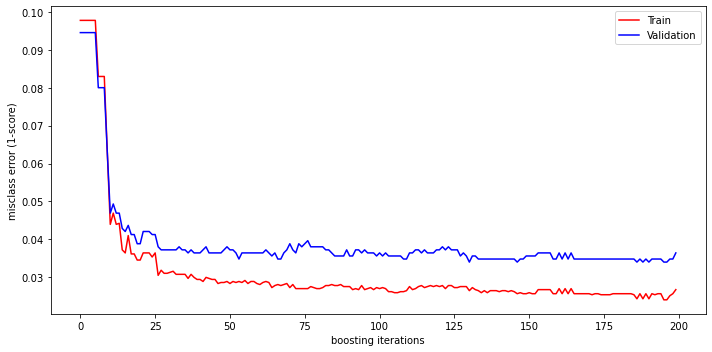

In [20]:
## Use adaboost with best n_estimators and learning_rate
clf= AdaBoostClassifier(n_estimators= 200, 
                        base_estimator= DecisionTreeClassifier(max_depth=1),  
                        learning_rate= .3,
                        random_state= 1234)
clf.fit(xtrain, ytrain)

check_train= clf.staged_score(xtrain, ytrain)
check_test= clf.staged_score(xtest, ytest)

##get list of misclass score from generator function
miscl_train= [1-sc for sc in check_train]
miscl_test= [1-sc for sc in check_test]

x= range(200)             
plt.plot(x, miscl_train, color= 'r',label= 'Train')
plt.plot(x, miscl_test, color='b', label= 'Validation')
plt.xlabel('boosting iterations')
plt.ylabel('misclass error (1-score)')
##plt.title()
plt.legend()
plt.show()


Empty DataFrame
Columns: [Income, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, Online, CreditCard]
Index: []
[0.455 0.065 0.205 0.09  0.01  0.015 0.075 0.035 0.05 ]


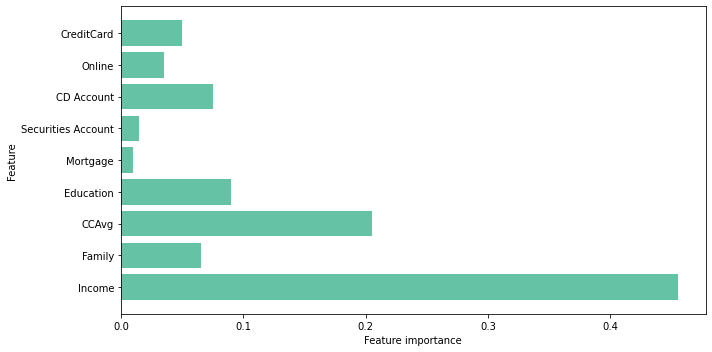

In [21]:
##check for important features by rank
impfeats= clf.feature_importances_
print(X_train.head(0))
print(impfeats)

##plot important features
## the feature importance is the amount of information gain determined by the
## average feature importance from our base Decision Tree Classifier

nfeats= X_train.shape[1]
plt.figure(figsize=(10,5))
plt.barh(range(nfeats), clf.feature_importances_, align='center')
plt.yticks(np.arange(nfeats), X_train.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()    

## Income is the feature with the most information gain in our adaboost model 
## followed by Credit cards per month (CCavg)

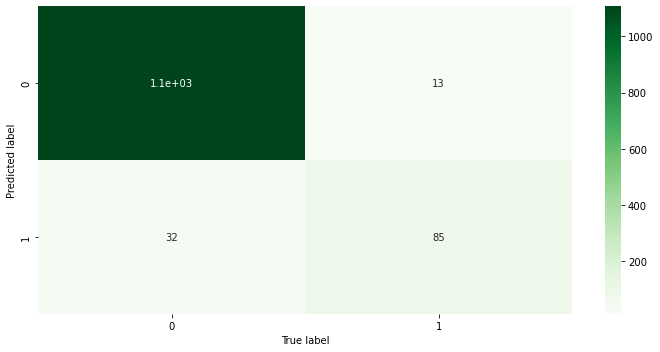

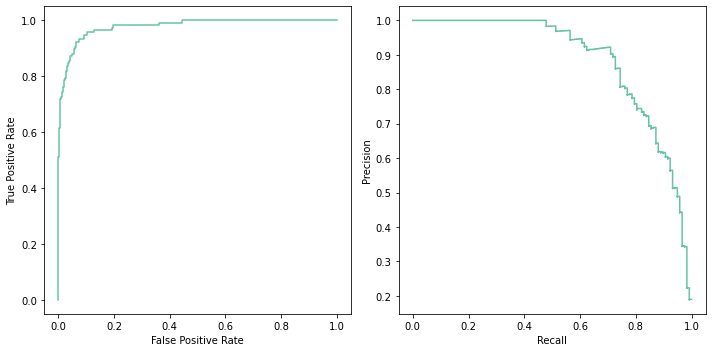

In [22]:
## Use a confusion Matrix to visualuze performance including metrics such as true positve rate and precision
y_pred= clf.predict(xtest)
confmat= confusion_matrix(ytest, y_pred)
sns.heatmap(confmat, annot= True, cmap="Greens")
plt.xlabel("True label")
plt.ylabel("Predicted label")

##true pos and precision
y_score= clf.decision_function(xtest)
falsepos, truepos, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc= RocCurveDisplay(fpr= falsepos, tpr= truepos)

prec, rec, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
prec_rec= PrecisionRecallDisplay(precision= prec, recall= rec)

##plot both in same chart
figure, (p1, p2)= plt.subplots(1, 2, figsize= (10,5))

roc.plot(p1)
prec_rec.plot(p2)
plt.show()

In [24]:
## Sure our Adaboost model predicts very well on the data. Can we do better with other models?
## Let's see how it performs compared to 3 other models: Logistic regression, K nearest neighbors and randomforest
## For simpliicity, we wil use compareable hyperparaters (if applicabe) for the other models
## to compare with our Adaboost classifer

##make list of models
listmod=[]
listmod.append(AdaBoostClassifier(n_estimators=125, learning_rate=0.3, random_state=1234))
listmod.append(LogisticRegression(max_iter=125 , random_state= 1234)) ##using this becuase we have 0's and 1's predictors
listmod.append(KNeighborsClassifier())
listmod.append(RandomForestClassifier(random_state= 1234))

## Loop through models and save model name and accuracy score to pandas dataframe for plotting
moddat= pd.DataFrame(columns= ["model", "acc_score"])
for mod in listmod:
    mod.fit(xtrain, ytrain)
    y_pred= mod.predict(xtest)
    model_name = type(mod).__name__
    acc_score= mod.score(xtest, ytest)
    ##rows= pd.DataFrame([[model_name,acc_score]], columns= ["model","acc_score"])
    rows= {"model":model_name, "acc_score":round(acc_score,3)}
    ##rows.append(rows)
    moddat= moddat.append(rows, ignore_index=True)
##moddat

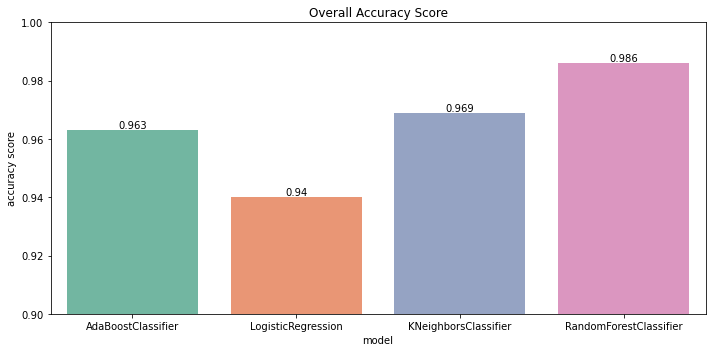

In [25]:
## Let's visualize the scores of all 4 models. Which one is better?

accplot = sns.barplot(x='model', y='acc_score',
                      data= moddat,
                      errwidth=0)
plt.ylim(0.9, 1.0)
plt.title("Overall Accuracy Score")
plt.ylabel("accuracy score")
for i in accplot.containers:
    accplot.bar_label(i,)
plt.show()

## 5. Discussion/Conclusion

In this project, we analyzed the personal bank loan data using the adaboost model. Through exploratory data analysis, we identified no missing values in the dataset. We determined that all features should be positive values while some features have values that are binary while some are continuous. Some variables we removed because there was high multicollinearity between those features (such as age and experience) while others such as zip code and ID do not make sense to include since they are identifiers or nominal (categorical) data. The adaboost model is a simple yet powerful machine learning tool for making predictions using the training and testing datasets and I was able to determine the most importance features (Income and CCavg) that are associated with an individual earning a personal loan. Other machine learning models such as K nearest neighbors and RandomForest had higher prediction accuracy and can be tuned to possibly have a higher prediction scores although all models havd very high accuracy (>90%) It would be interesting to compare the the scores with other ensemble methods such as gradient boost and xgboost. Support vector machines may also produce high prediction accuracy in less learning time although for datasets with as relatively low features and moderately-sized observations, a logistic regression or Naivebayes model may do just as well to make accurate predictions and classifications as the ones shown in this analysis.